# ניתוח 26.12.21

In [60]:
from random import randint as ri
from itertools import chain
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import datetime as dt
import matplotlib.ticker as mtick

#all
all_data = pd.read_excel("Data2/קובץ מתכלל כללי.xlsx")

#sviot ratzon
all_data[all_data.columns[41]] = all_data[all_data.columns[41]].apply(lambda x: "כן" if x==0 else "לא")

#colors
my_colors = ["orange","yellow","red","lime","pink",
         "mediumpurple","skyblue","cornflowerblue","gray","gainsboro",
         "gold","turquoise","chocolate","forestgreen","orchid"]


In [5]:
df = all_data[all_data[all_data.columns[55]]=="מיטבי"]

l = [a.split(",") for a in df.iloc[:,15].dropna()]
l = list(chain.from_iterable(l))
#[x+1 if x >= 45 else x+5 for x in l]
l =  [a[1:] if a.startswith(" ") else a for a in l]  
l =  [a[:-1] if a.endswith(" ") else a for a in l]  
#set(l)
Data = dict(Counter(l))
Data = {k: Data[k] for k in sorted(Data, key=Data.get, reverse=True)}
Data

{'תחבורה ציבורית - אוטובוס': 319,
 'תחבורה ציבורית - רכבת': 265,
 'הסעות צבאיות שהוזמנו על ידי היחידה': 126,
 'רכב פרטי': 100,
 'הסעה צבאית שהוזמנה ע"י היחידה ללא שימוש באפליקציית "שאט"ל"': 92,
 'הסעה צבאית שהוזמנה ליחידה על ידי אפליקציית "שאט"ל"': 84,
 'הסעות צבאיות בהזמנת החייל (אפליקציית "שאטל")': 42,
 'אחר': 11,
 'טרמפים': 11}

# שקף 13

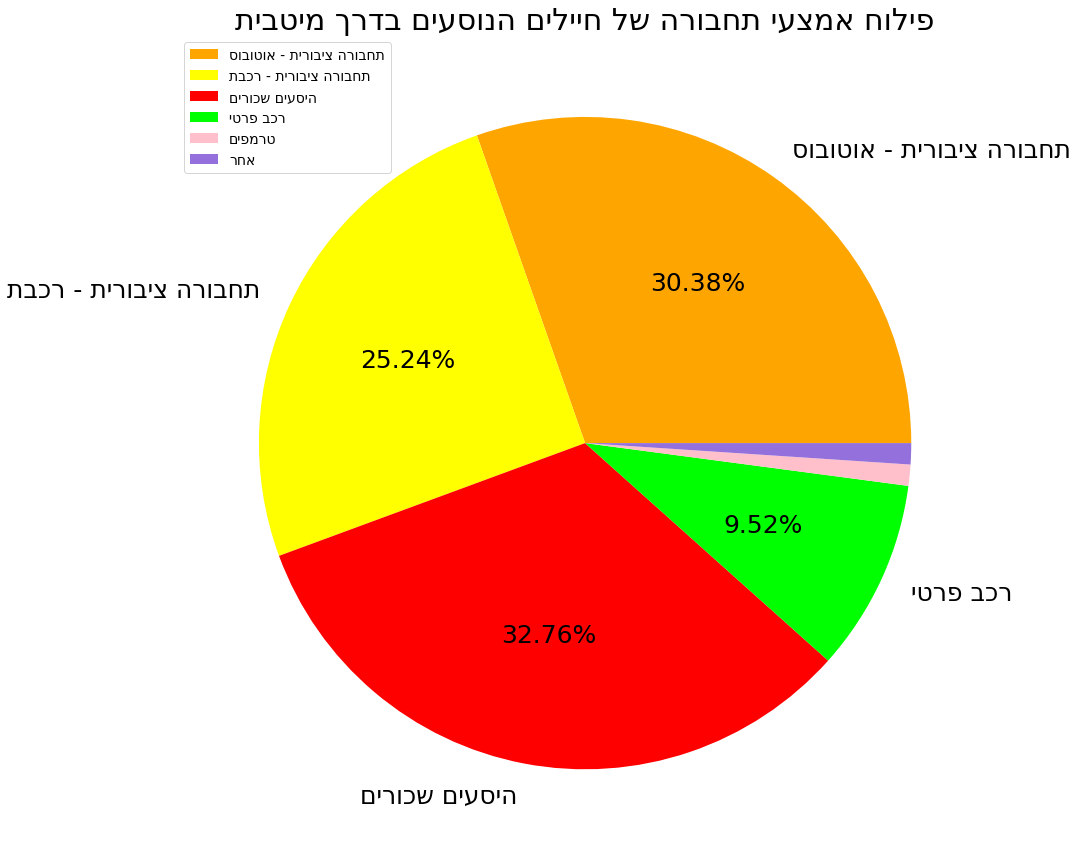

In [8]:
labels = ["תחבורה ציבורית - אוטובוס","תחבורה ציבורית - רכבת","היסעים שכורים","רכב פרטי","טרמפים","אחר"]
sizes = [319,265,344,100,11,11]

labels= [label[::-1] for label in labels]
label_dict = dict(zip(labels,np.array(sizes)/sum(sizes)))

colors = dict(zip(labels,my_colors[:6]))
plt.figure(figsize  = (15,15))
plt.pie(sizes, labels=[label if label_dict[label]>0.035  else "" for label in labels],colors = [colors[p] for p in labels], autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 3.5 else '',textprops={'fontsize': 25})
title_text = "פילוח אמצעי תחבורה של חיילים הנוסעים בדרך מיטבית"
plt.title(f'{title_text[::-1]}', size=  30)
plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,loc = 'upper left',fontsize = 14)
plt.show()

# שקף 16

In [20]:
henionim_telaviv = ['בית דני','אצטדיון רמת גן','חניון ארלוזורוב תל אביב','תחנה מרכזית תל אביב', 'הדר יוסף תל אביב', 'רידינג תל אביב']

df = all_data[(all_data[all_data.columns[5]].isin(henionim_telaviv))]
df1 = df[df.columns[52]].value_counts().sort_index()
df2 = df[df.columns[48]].value_counts().sort_index()
df1

באר שבע               4
גוש דן              157
גליל עליון מזרחי      1
גליל תחתון מערבי      6
דרום                 25
השפלה                15
השרון               129
חיפה                  7
ירושלים              28
מזרח גוש דן         182
עפולה והעמקים         7
רמת הגולן             1
Name: אזור משני, dtype: int64

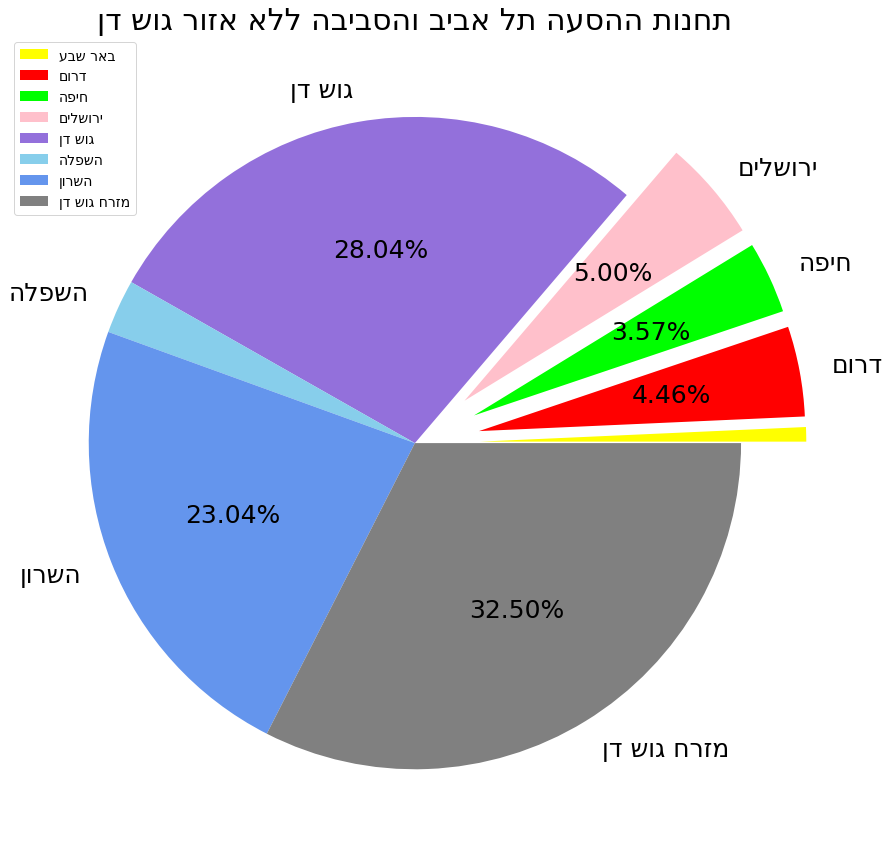

In [27]:
labels = ["באר שבע","דרום","חיפה","ירושלים","גוש דן","השפלה","השרון","מזרח גוש דן"]
sizes = [4,25,20,28,157,15,129,182]

labels= [label[::-1] for label in labels]
label_dict = dict(zip(labels,np.array(sizes)/sum(sizes)))

colors = dict(zip(labels,my_colors[1:9]))
plt.figure(figsize  = (15,15))
plt.pie(sizes, labels = [label if label_dict[label]>0.015  else "" for label in labels],colors = [colors[p] for p in labels],explode = [0.2]*4 + [0]*4,autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 3 else '',textprops={'fontsize': 25})
title_text = 'תחנות ההסעה תל אביב והסביבה ללא אזור גוש דן'
plt.title(title_text[::-1], size=  30)
#plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,loc = 'upper left',fontsize = 14)
plt.show()

# שקף 17

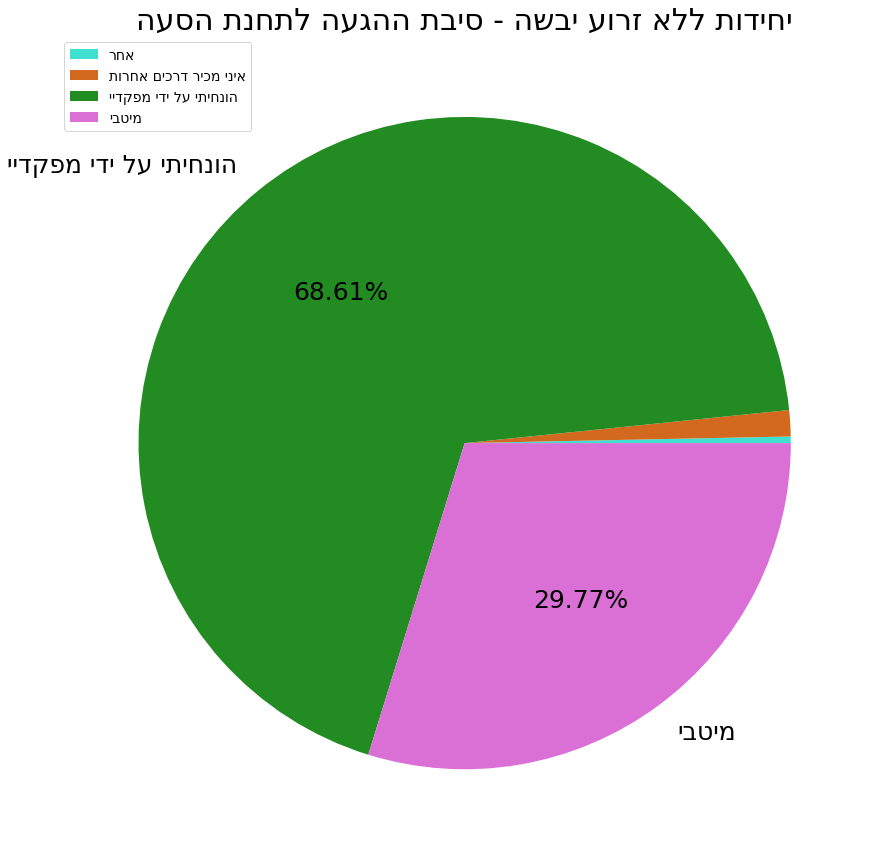

In [40]:
df = all_data[(all_data[all_data.columns[5]].isin(henionim_telaviv))&(~all_data[all_data.columns[53]].isin(['ז"י']))][all_data.columns[55]].value_counts().sort_index()
labels = df.index
sizes = df.values

labels= [label[::-1] for label in labels]
label_dict = dict(zip(labels,np.array(sizes)/sum(sizes)))

colors = dict(zip(labels,my_colors[-4:]))
plt.figure(figsize  = (15,15))
plt.pie(sizes, labels=[label if label_dict[label]>0.015  else "" for label in labels],colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 1.5 else '',textprops={'fontsize': 25})
title_text = 'יחידות ללא זרוע יבשה - סיבת ההגעה לתחנת הסעה'
plt.title(title_text[::-1], size=  30)
#plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,loc = 'upper left',fontsize = 14)
plt.show()

In [43]:
henionim_jas = ['תחנה מרכזית ירושלים', 'טדי ירושלים'] 

df = all_data[(all_data[all_data.columns[5]].isin(henionim_jas))]
df1 = df[df.columns[52]].value_counts().sort_index()
df2 = df[df.columns[48]].value_counts().sort_index()
print(df1)
print(df2)


גוש דן                8
גליל עליון מערבי      1
גליל תחתון מזרחי      3
דרום                 12
השפלה                 4
השרון                 7
חיפה                  2
ירושלים             169
מזרח גוש דן          14
עפולה והעמקים         2
רמת הגולן             3
Name: אזור משני, dtype: int64
דרום           12
חיפה            4
ירושלים       169
מרכז           33
צפון מזרחי      6
צפון מערבי      1
Name: אזור, dtype: int64


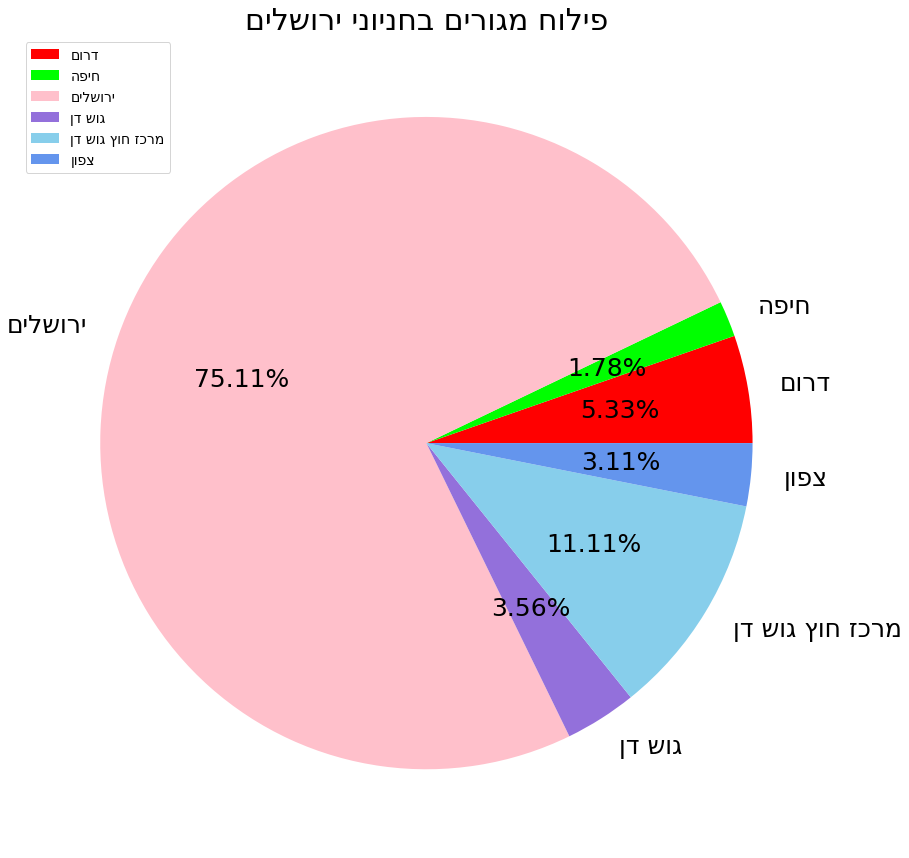

In [52]:
labels = ["דרום","חיפה","ירושלים","גוש דן","מרכז חוץ גוש דן","צפון"]
sizes = [12,4,169,8,25,7]
labels= [label[::-1] for label in labels]
label_dict = dict(zip(labels,np.array(sizes)/sum(sizes)))

colors = dict(zip(labels,my_colors[2:8]))
plt.figure(figsize  = (15,15))
plt.pie(sizes, labels = [label if label_dict[label]>0.015  else "" for label in labels],colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 1.5 else '',textprops={'fontsize': 25})
title_text = 'פילוח מגורים בחניוני ירושלים'
plt.title(title_text[::-1], size=  30)
#plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,loc = 'upper left',fontsize = 14)
plt.show()

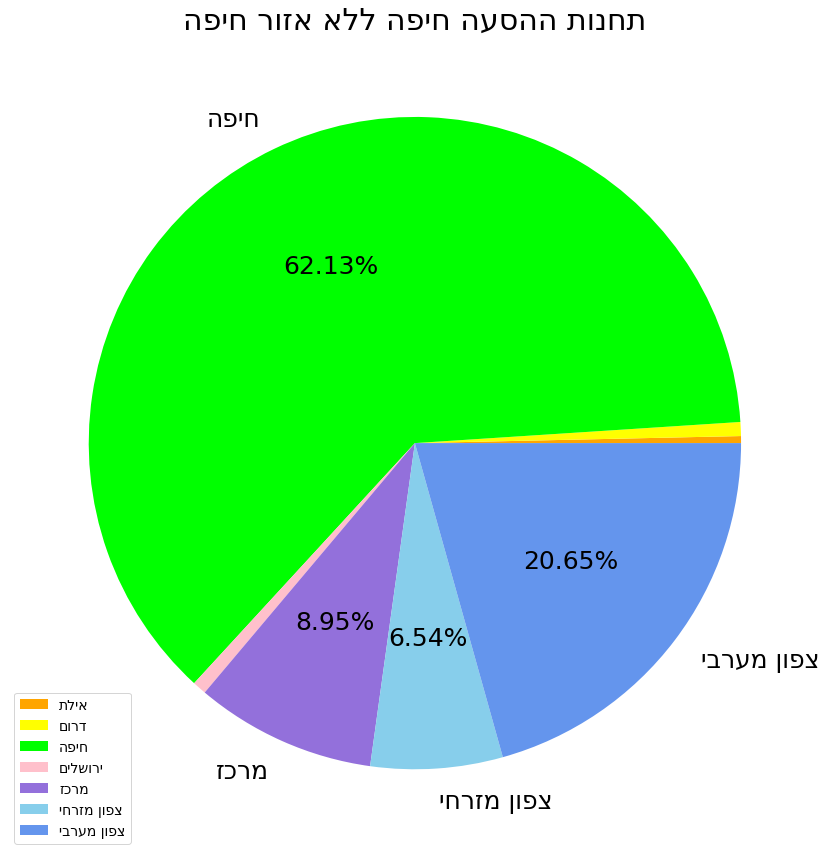

In [55]:
henionim_haifa = ['חניון חוף זמיר חיפה', 'חוף הכרמל חיפה','לב המפרץ חיפה']

df = all_data[(all_data[all_data.columns[5]].isin(henionim_haifa))]
df1 = df[df.columns[48]].value_counts().sort_index()
labels = df1.index
sizes = df1.values

labels= [label[::-1] for label in labels]
label_dict = dict(zip(labels,df1.values/sum(df1.values)))

colors = dict(zip(labels,my_colors[:2] + my_colors[3:]))
plt.figure(figsize  = (15,15))
plt.pie(sizes, labels = [label if label_dict[label]>0.03  else "" for label in labels],colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 3 else '',textprops={'fontsize': 25})
title_text = 'תחנות ההסעה חיפה ללא אזור חיפה'
plt.title(title_text[::-1], size=  30)
#plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,fontsize = 14)
plt.show()

# שקף 28

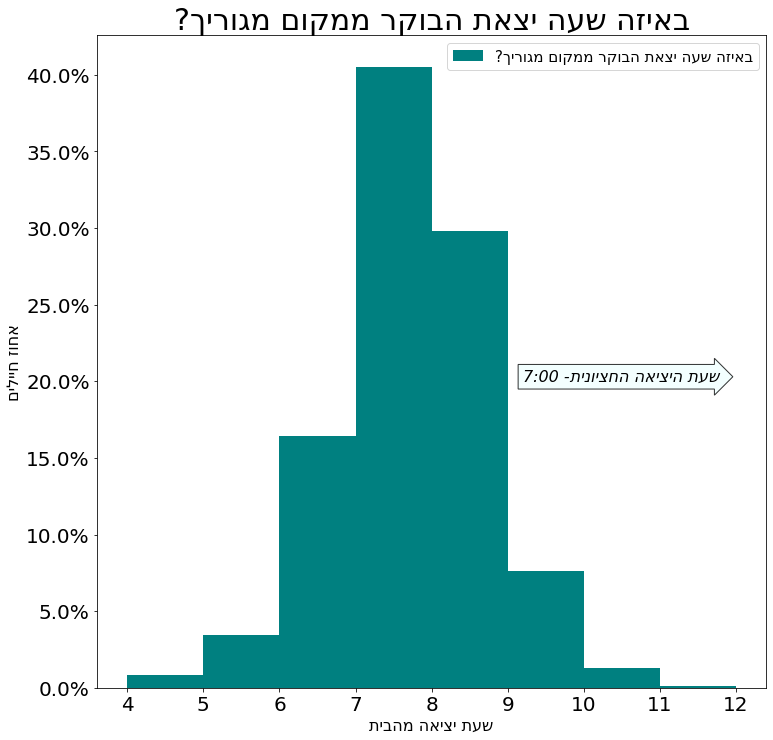

In [177]:
df = pd.DataFrame(pd.to_datetime(all_data[all_data.columns[44]]).dt.hour)
ax = df.plot(kind = 'hist',density = True,bins = 8,color = 'teal', figsize = (12,12))
plt.legend([df.columns[0][::-1]],fontsize = 15)
plt.xticks(size = 20)
plt.yticks(size = 20)
title_text = df.columns[0][::-1]
plt.title(title_text,size = 30)
plt.ylabel("אחוז חיילים"[::-1], size = 16)
plt.xlabel("שעת יציאה מהבית"[::-1], size = 16)
text = f"שעת היציאה החציונית- 00:{int(df.mean())}"
ax.text(9.2,0.2,text[::-1], size = 16,style = 'italic',bbox=dict(facecolor='azure',alpha=0.8, edgecolor='black', boxstyle='rarrow,pad=0.3'))
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks([i for i in range(4,13)])
plt.show()

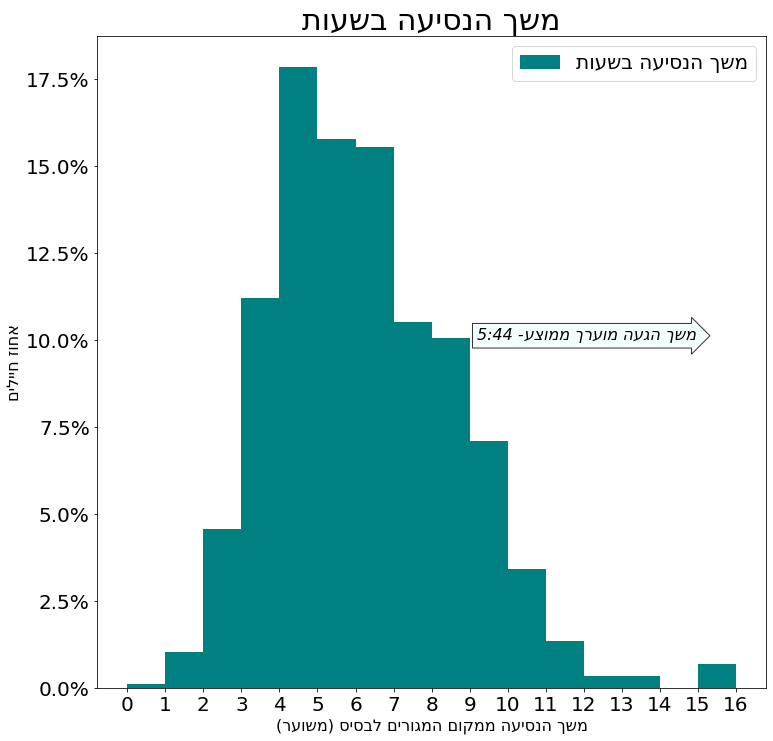

In [178]:
df = pd.DataFrame(all_data[all_data.columns[51]])
df = df.dropna()
ax = df.plot(kind = 'hist',density = True,bins = 16,color = 'teal', figsize = (12,12))
plt.xticks(size = 20)
plt.yticks(size = 20)
title_text = "משך הנסיעה בשעות"
plt.title(title_text[::-1],size = 30)
plt.legend([title_text[::-1]],fontsize = 20)

plt.ylabel("אחוז חיילים"[::-1], size = 16)
plt.xlabel("משך הנסיעה ממקום המגורים לבסיס )משוער("[::-1], size = 16)
text = f"משך הגעה מוערך ממוצע- {str(int((df.mean() - int(df.mean()))*60))[::-1]}:{int(df.mean())}"
ax.text(9.2,0.1,text[::-1], size = 16,style = 'italic',bbox=dict(facecolor='azure',alpha=0.8, edgecolor='black', boxstyle='rarrow,pad=0.3'))
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks([i for i in range(17)])
plt.show()

In [179]:
df.dropna()

,הפרשי שעות מעריך
1085,3.0
1086,5.0
1087,5.0
1088,6.0
1089,4.0
...,...
1955,6.0
1956,16.0
1957,13.0
1958,16.0


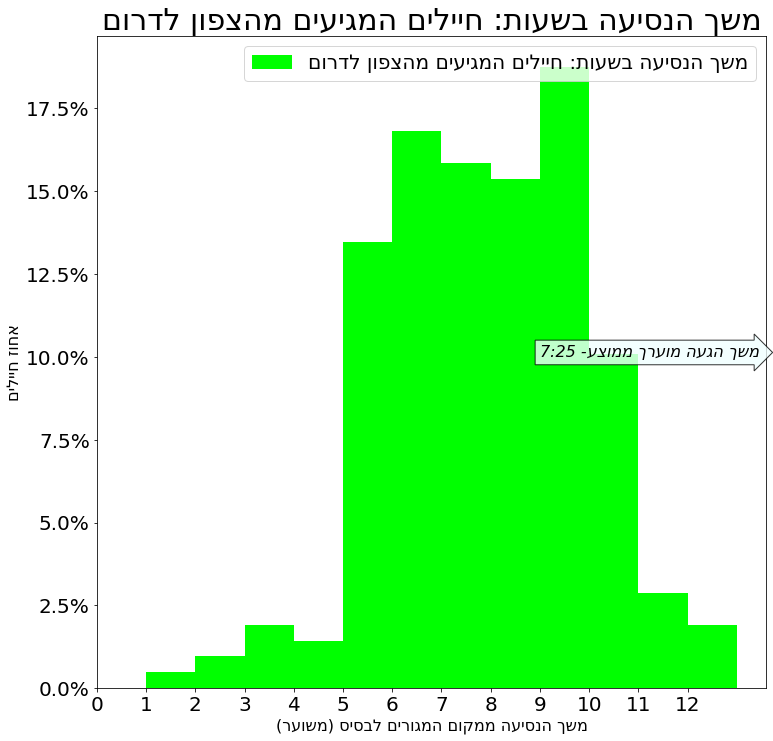

In [180]:
df = all_data[(all_data[all_data.columns[48]].isin(['צפון מערבי','צפון מזרחי','חיפה']))&(all_data[all_data.columns[54]].isin(['דרום','באר שבע']))]
df = pd.DataFrame(df[df.columns[51]])
ax = df.plot(kind = 'hist',density = True,bins = 12,color = my_colors[3], figsize = (12,12))
plt.xticks(size = 20)
plt.yticks(size = 20)
title_text = "משך הנסיעה בשעות: חיילים המגיעים מהצפון לדרום"
plt.title(title_text[::-1],size = 30)
plt.legend([title_text[::-1]],fontsize = 20)

plt.ylabel("אחוז חיילים"[::-1], size = 16)
plt.xlabel("משך הנסיעה ממקום המגורים לבסיס )משוער("[::-1], size = 16)
text = f"משך הגעה מוערך ממוצע- {str(int((df.mean() - int(df.mean()))*60))[::-1]}:{int(df.mean())}"
ax.text(9,0.1,text[::-1], size = 16,style = 'italic',bbox=dict(facecolor='azure',alpha=0.8, edgecolor='black', boxstyle='rarrow,pad=0.3'))
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks([i for i in range(13)])
plt.show()

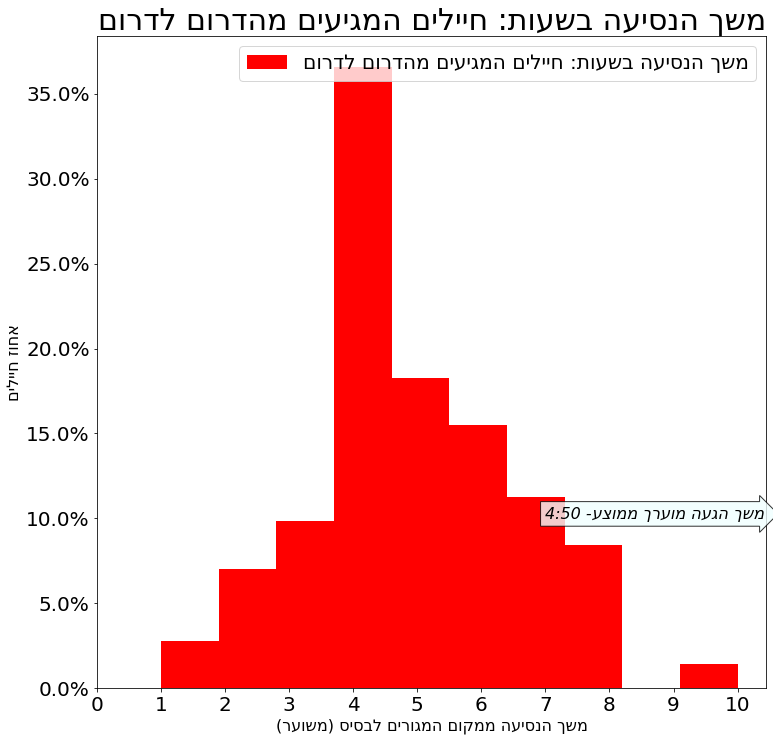

In [181]:
df = all_data[(all_data[all_data.columns[48]].isin(['דרום','באר שבע']))&(all_data[all_data.columns[54]].isin(['דרום','באר שבע']))]

df = pd.DataFrame(df[df.columns[51]])
ax = df.plot(kind = 'hist',density = True,bins = 10,color = my_colors[2], figsize = (12,12))
plt.xticks(size = 20)
plt.yticks(size = 20)
title_text = "משך הנסיעה בשעות: חיילים המגיעים מהדרום לדרום"
plt.title(title_text[::-1],size = 30)
plt.legend([title_text[::-1]],fontsize = 20)

plt.ylabel("אחוז חיילים"[::-1], size = 16)
plt.xlabel("משך הנסיעה ממקום המגורים לבסיס )משוער("[::-1], size = 16)
text = f"משך הגעה מוערך ממוצע- {str(int((df.mean() - int(df.mean()))*60))[::-1]}:{int(df.mean())}"
ax.text(7,0.1,text[::-1], size = 16,style = 'italic',bbox=dict(facecolor='azure',alpha=0.8, edgecolor='black', boxstyle='rarrow,pad=0.3'))
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks([i for i in range(11)])
plt.show()

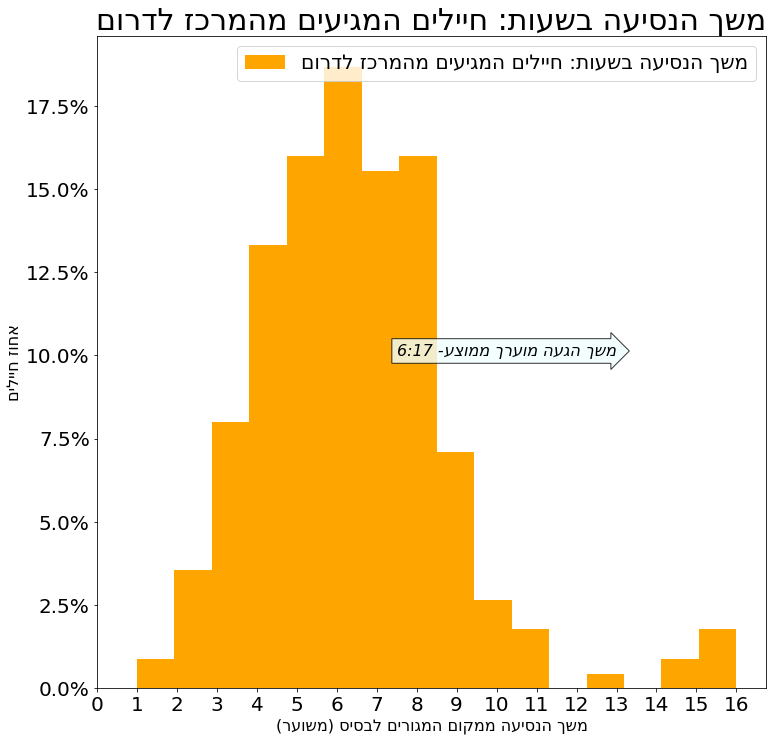

In [183]:
df = all_data[(all_data[all_data.columns[48]].isin(['מרכז']))&(all_data[all_data.columns[54]].isin(['דרום','באר שבע']))]

df = pd.DataFrame(df[df.columns[51]])
ax = df.plot(kind = 'hist',density = True,bins = 16,color = my_colors[0], figsize = (12,12))
plt.xticks(size = 20)
plt.yticks(size = 20)
title_text = "משך הנסיעה בשעות: חיילים המגיעים מהמרכז לדרום"
plt.title(title_text[::-1],size = 30)
plt.legend([title_text[::-1]],fontsize = 20)

plt.ylabel("אחוז חיילים"[::-1], size = 16)
plt.xlabel("משך הנסיעה ממקום המגורים לבסיס )משוער("[::-1], size = 16)
text = f"משך הגעה מוערך ממוצע- {str(int((df.mean() - int(df.mean()))*60))[::-1]}:{int(df.mean())}"
ax.text(7.5,0.1,text[::-1], size = 16,style = 'italic',bbox=dict(facecolor='azure',alpha=0.8, edgecolor='black', boxstyle='rarrow,pad=0.3'))
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.xticks([i for i in range(17)])
plt.show()

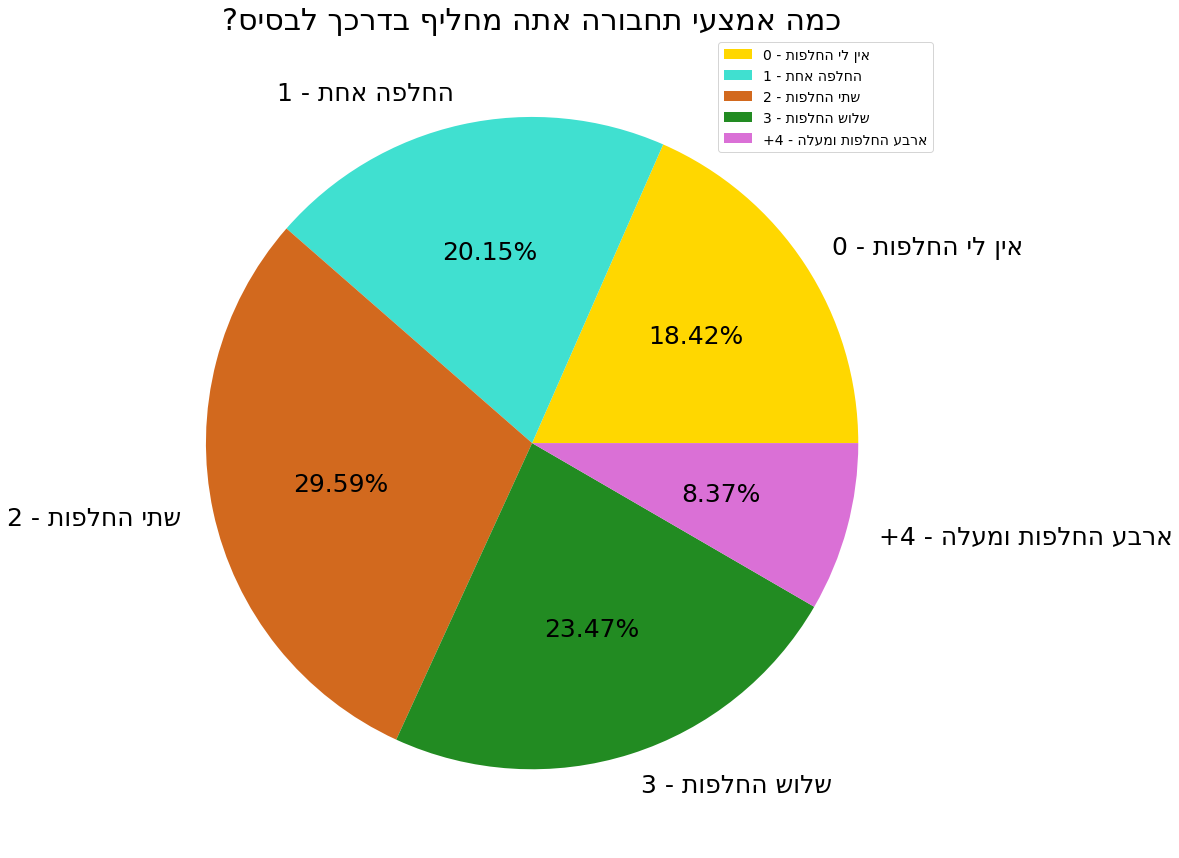

In [189]:
df = all_data[all_data.columns[18]].value_counts().reindex(['אין לי החלפות - 0','החלפה אחת - 1','שתי החלפות - 2','שלוש החלפות - 3','ארבע החלפות ומעלה - 4+'])
labels = df.index
sizes = df.values


labels= [label[::-1] for label in labels]
label_dict = dict(zip(labels,df.values/sum(df.values)))

colors = dict(zip(labels,my_colors[-5:]))
plt.figure(figsize  = (15,15))
plt.pie(sizes, labels=[label if label_dict[label]>0.03  else "" for label in labels],colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 3 else '',textprops={'fontsize': 25})
title_text = all_data.columns[18]
plt.title(title_text[38::-1], size=  30)
plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,fontsize = 14)
plt.show()

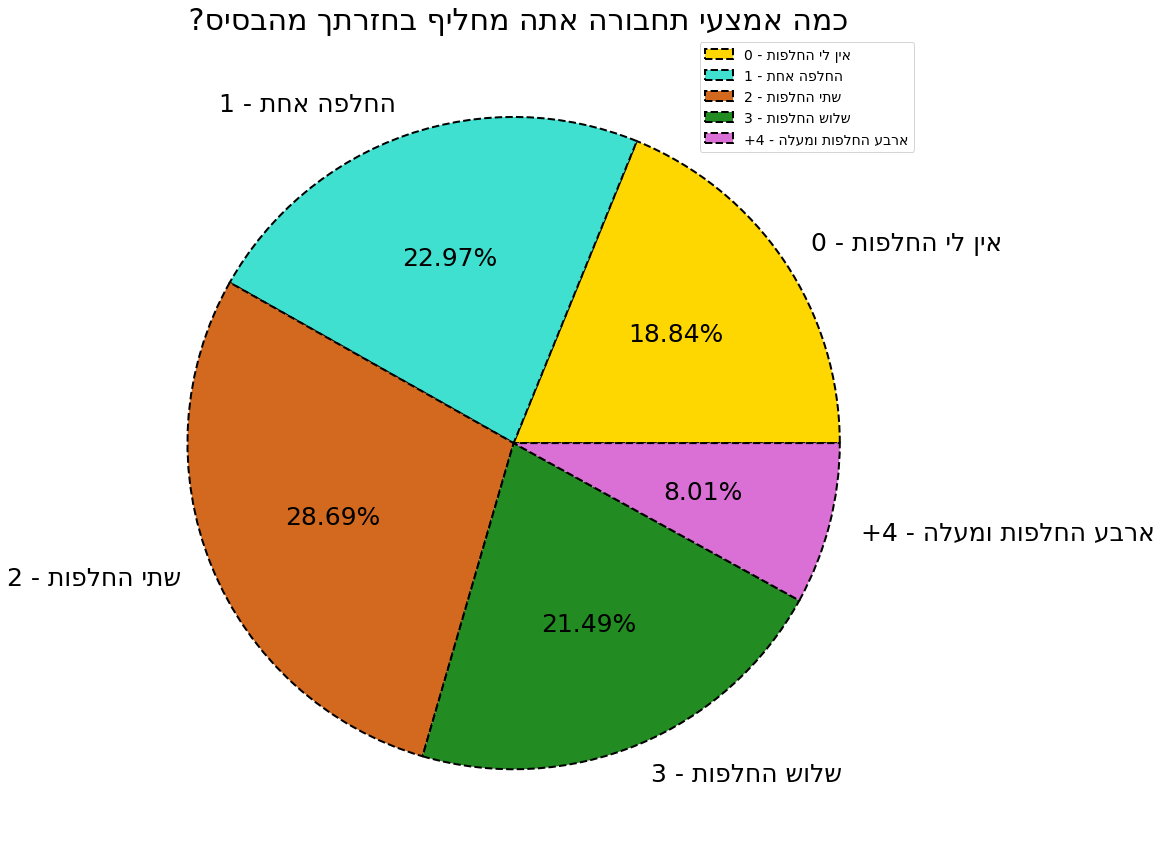

In [196]:
df = all_data[all_data.columns[22]].value_counts().reindex(['אין לי החלפות - 0','החלפה אחת - 1','שתי החלפות - 2','שלוש החלפות - 3','ארבע החלפות ומעלה - 4+'])
labels = df.index
sizes = df.values


labels= [label[::-1] for label in labels]
label_dict = dict(zip(labels,df.values/sum(df.values)))

colors = dict(zip(labels,my_colors[-5:]))
plt.figure(figsize  = (15,15))
plt.pie(sizes, labels=[label if label_dict[label]>0.03  else "" for label in labels],colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 3 else '',textprops={'fontsize': 25},wedgeprops={"edgecolor":"k",'linewidth': 2, 'linestyle': 'dashed', 'antialiased': True})
title_text = all_data.columns[22]
plt.title(title_text[41::-1], size=  30)
plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,fontsize = 14)
plt.show()

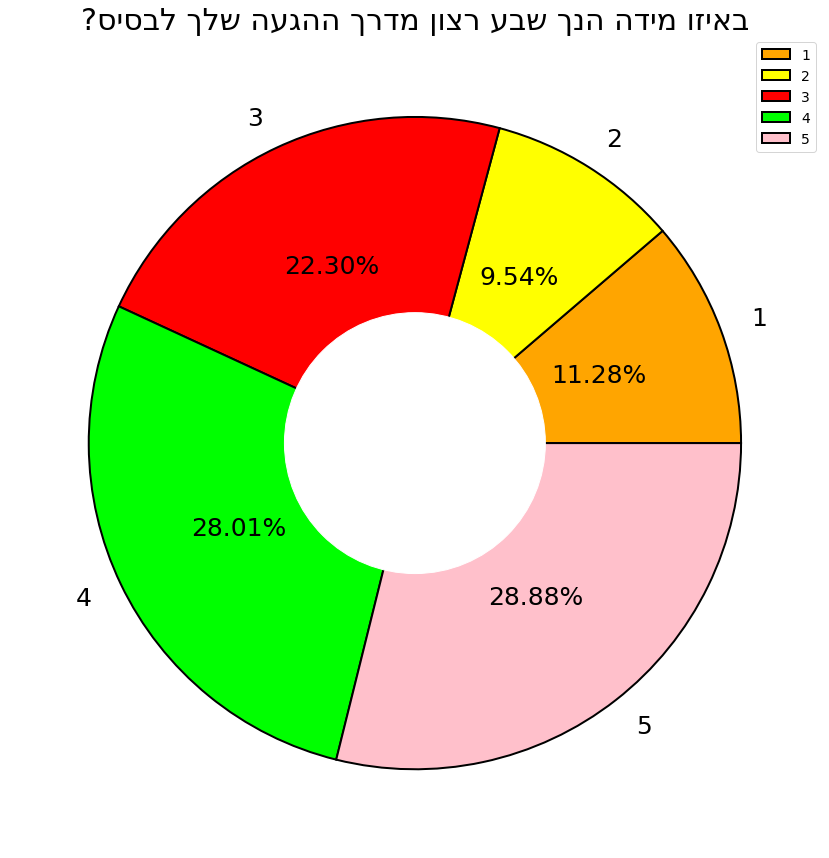

In [225]:
df = all_data[all_data.columns[14]].value_counts().sort_index()
labels = df.index
sizes = df.values


#labels= [label[::-1] for label in labels]
label_dict = dict(zip(labels,df.values/sum(df.values)))

colors = dict(zip(labels,my_colors[:5]))
plt.figure(figsize  = (15,15))


circle = plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.pie(sizes, labels=[label if label_dict[label]>0.03  else "" for label in labels],colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 3 else '',textprops={'fontsize': 25}
       ,wedgeprops={"edgecolor":"k",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
title_text = all_data.columns[14]
plt.title(title_text[::-1], size=  30)
plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,fontsize = 14)


plt.show()

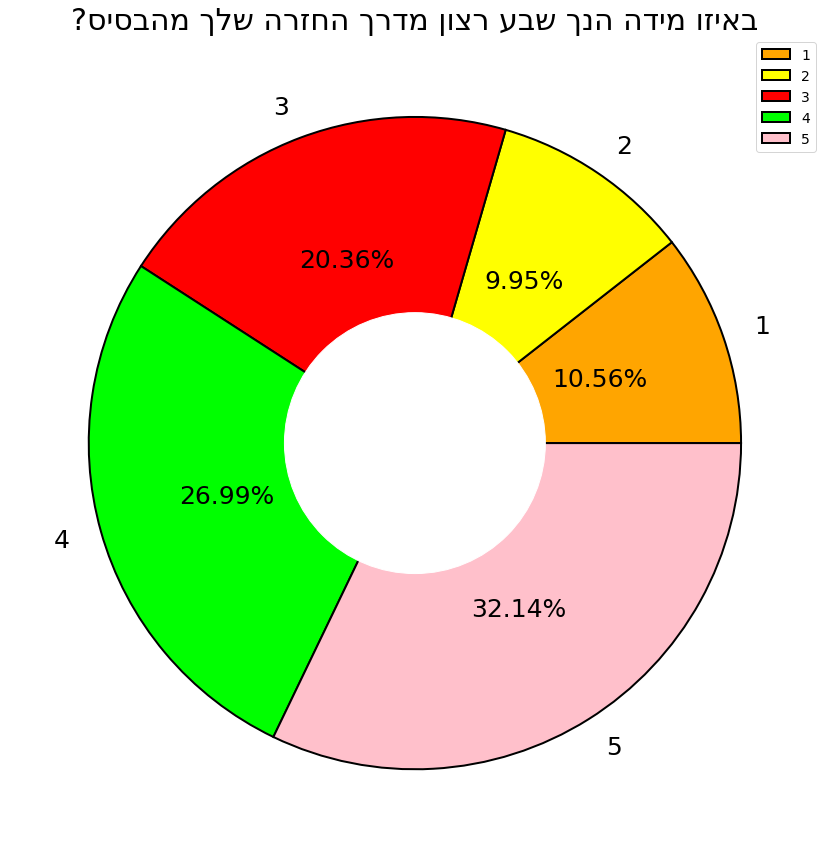

In [223]:
df = all_data[all_data.columns[19]].value_counts().sort_index()
labels = df.index
sizes = df.values


#labels= [label[::-1] for label in labels]
label_dict = dict(zip(labels,df.values/sum(df.values)))

colors = dict(zip(labels,my_colors[:5]))
plt.figure(figsize  = (15,15))


circle = plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.pie(sizes, labels=[label if label_dict[label]>0.03  else "" for label in labels],colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 3 else '',textprops={'fontsize': 25}
       ,wedgeprops={"edgecolor":"k",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
title_text = all_data.columns[19]
plt.title(title_text[::-1], size=  30)
plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,fontsize = 14)


plt.show()

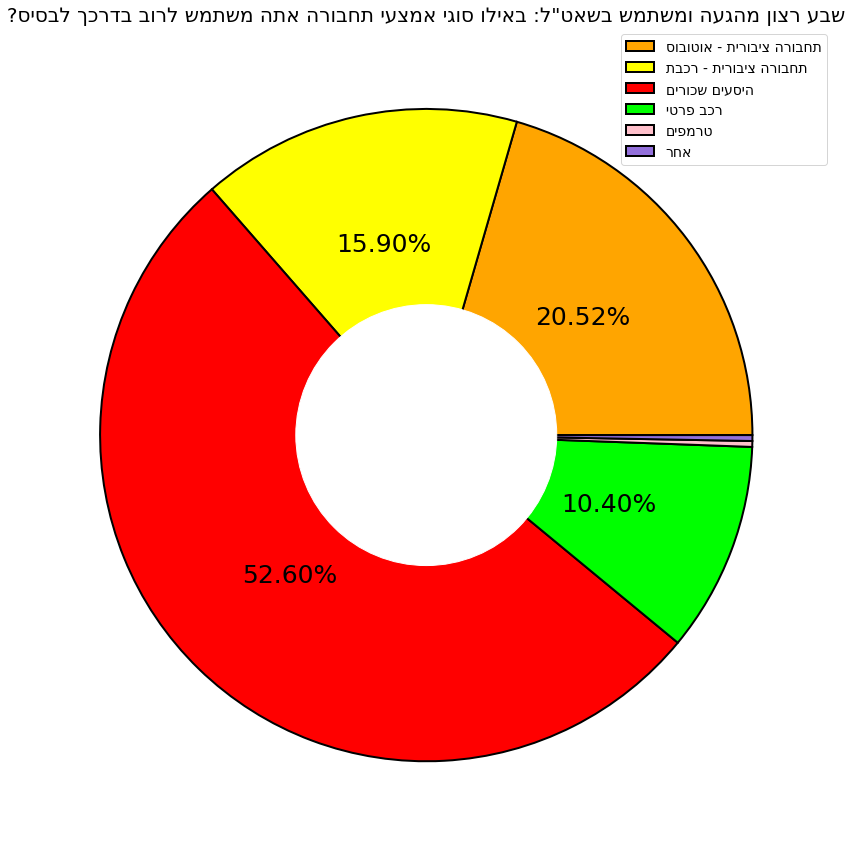

In [234]:
df = all_data[(all_data[all_data.columns[14]].isin([5]))&(all_data[all_data.columns[24]]=="כן")]#.value_counts()#.reindex(["כן"]
l = [a.split(",") for a in df.iloc[:,15].dropna()]
l = list(chain.from_iterable(l))
#[x+1 if x >= 45 else x+5 for x in l]
l =  [a[1:] if a.startswith(" ") else a for a in l]  
l =  [a[:-1] if a.endswith(" ") else a for a in l]  
#set(l)
Data = dict(Counter(l))
Data = {k: Data[k] for k in sorted(Data, key=Data.get, reverse=True)}
labels = ["תחבורה ציבורית - אוטובוס","תחבורה ציבורית - רכבת","היסעים שכורים","רכב פרטי","טרמפים","אחר"]
sizes = [71,55,182,36,1,1]
labels= [label[::-1] for label in labels]
colors = dict(zip(labels,my_colors))
plt.figure(figsize  = (15,15))
circle = plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.pie(sizes, labels=None,colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 3 else '',textprops={'fontsize': 25}
       ,wedgeprops={"edgecolor":"k",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
title_text = 'שבע רצון מהגעה ומשתמש בשאט"ל'
plt.title(f"{all_data.columns[15][50::-1]} :{title_text[::-1]}", size=  20)
plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,fontsize = 14)


plt.show()

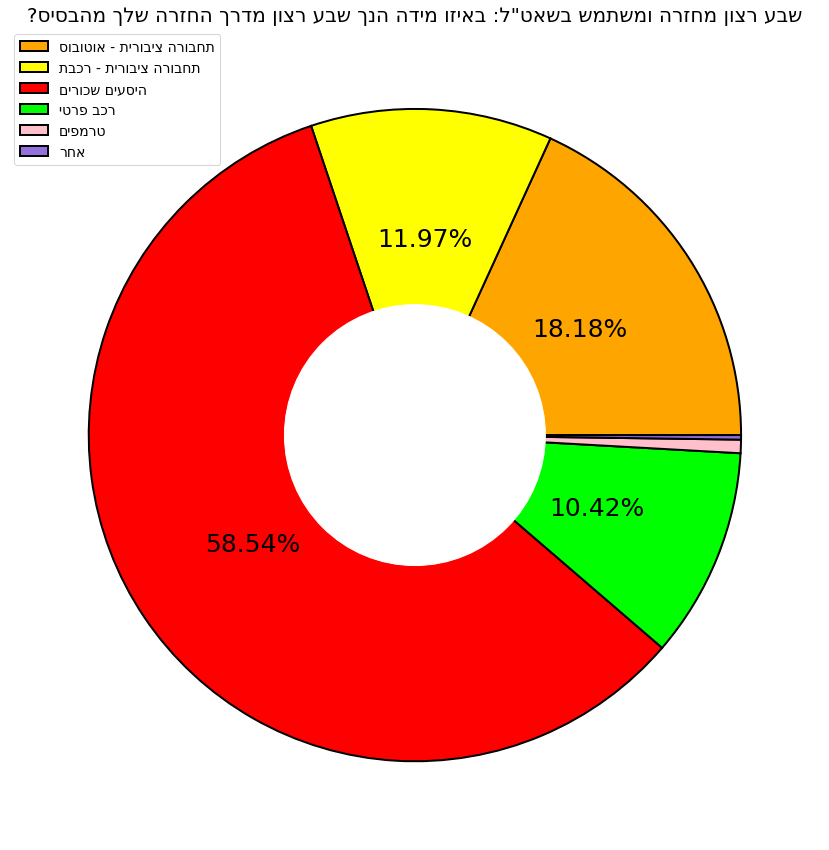

In [240]:
df = all_data[(all_data[all_data.columns[19]].isin([5]))&(all_data[all_data.columns[24]]=="כן")]#.value_counts()#.reindex(["כן"]
l = [a.split(",") for a in df.iloc[:,20].dropna()]
l = list(chain.from_iterable(l))
#[x+1 if x >= 45 else x+5 for x in l]
l =  [a[1:] if a.startswith(" ") else a for a in l]  
l =  [a[:-1] if a.endswith(" ") else a for a in l]  
#set(l)
Data = dict(Counter(l))
Data = {k: Data[k] for k in sorted(Data, key=Data.get, reverse=True)}
labels = ["תחבורה ציבורית - אוטובוס","תחבורה ציבורית - רכבת","היסעים שכורים","רכב פרטי","טרמפים","אחר"]
sizes = [82,54,264,47,3,1]
labels= [label[::-1] for label in labels]
colors = dict(zip(labels,my_colors))
plt.figure(figsize  = (15,15))
circle = plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

plt.pie(sizes, labels=None,colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 3 else '',textprops={'fontsize': 25}
       ,wedgeprops={"edgecolor":"k",'linewidth': 2, 'linestyle': 'solid', 'antialiased': True})
title_text = 'שבע רצון מחזרה ומשתמש בשאט"ל'
plt.title(f"{all_data.columns[19][50::-1]} :{title_text[::-1]}", size=  20)
plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,fontsize = 14)


plt.show()

# שקף 60

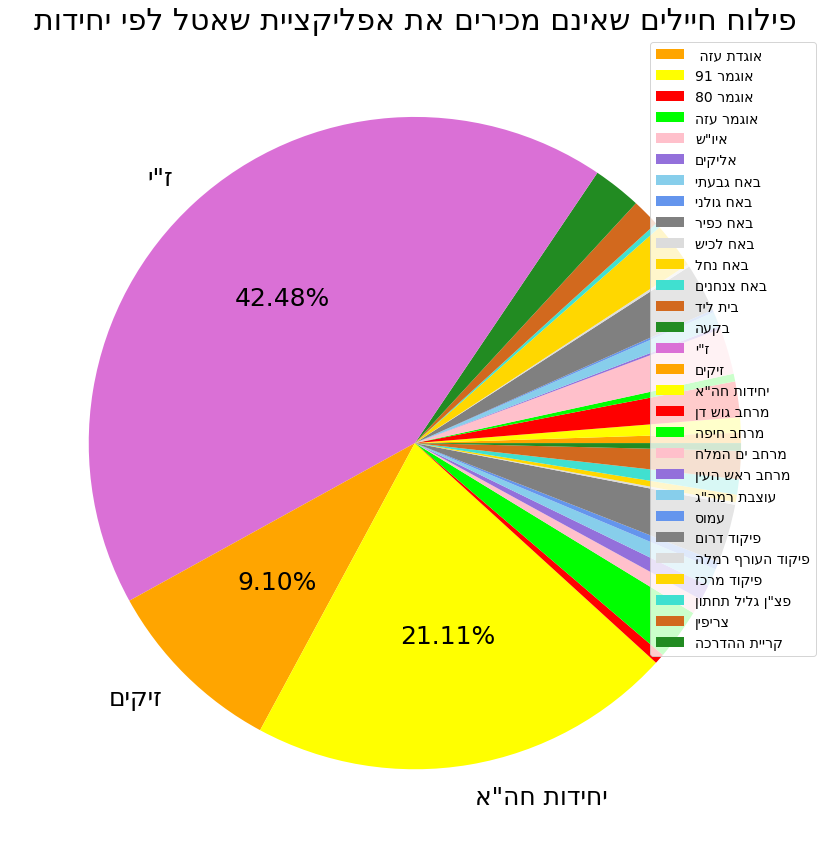

In [241]:
df = all_data[all_data[all_data.columns[23]]=="לא"][all_data.columns[53]].value_counts().sort_index()
labels = df.index
sizes = df.values
labels= [label[::-1] for label in labels]

labels[1] = "91 רמגוא"
labels[2] = "80 רמגוא"

label_dict = dict(zip(labels,df.values/sum(df.values)))

colors = dict(zip(labels,my_colors + my_colors))
plt.figure(figsize  = (15,15))
plt.pie(sizes, labels=[label if label_dict[label]>0.03  else "" for label in labels],colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 3 else '',textprops={'fontsize': 25})
title_text = "פילוח חיילים שאינם מכירים את אפליקציית שאטל לפי יחידות"
plt.title(title_text[::-1], size=  30)
plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,loc = 'upper right',fontsize = 14)
plt.show()

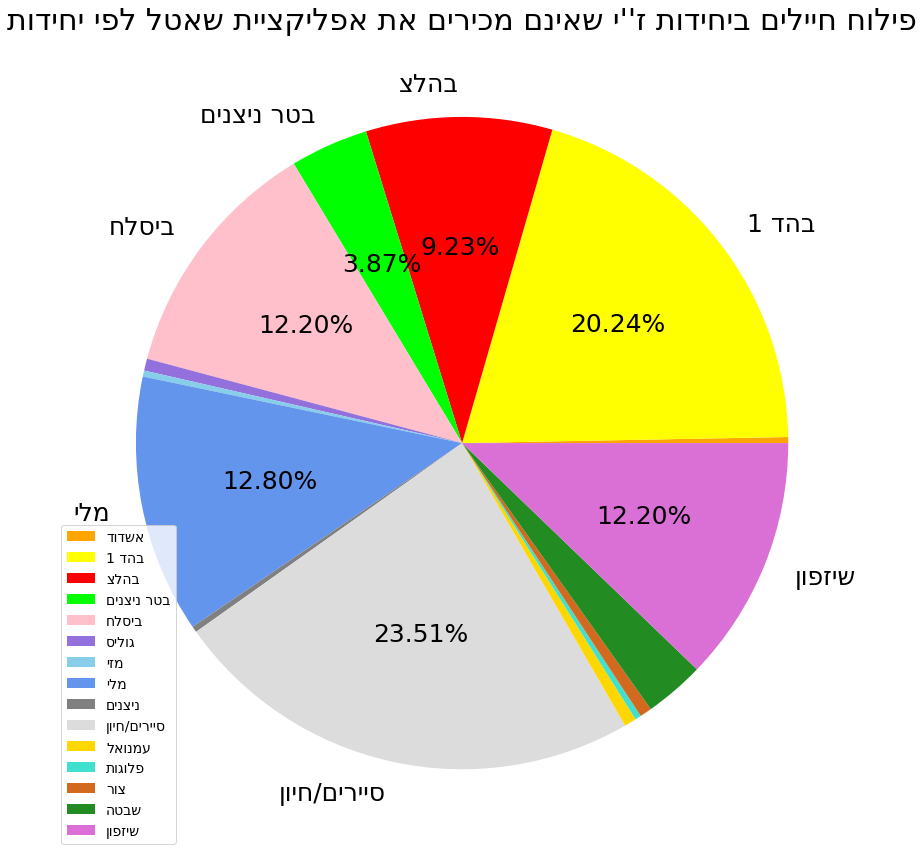

In [248]:
df = all_data[(all_data[all_data.columns[23]]=="לא")&(all_data[all_data.columns[53]]=='ז"י')][all_data.columns[4]].value_counts().sort_index()
labels = df.index
sizes = df.values
labels= [label[::-1] for label in labels]

#labels[1] = "91 רמגוא"
#labels[2] = "80 רמגוא"

label_dict = dict(zip(labels,df.values/sum(df.values)))

colors = dict(zip(labels,my_colors + my_colors))
plt.figure(figsize  = (15,15))
plt.pie(sizes, labels=[label if label_dict[label]>0.03  else "" for label in labels],colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 3 else '',textprops={'fontsize': 25})
title_text = "פילוח חיילים ביחידות ז''י שאינם מכירים את אפליקציית שאטל לפי יחידות"
plt.title(title_text[::-1], size=  30)
plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,loc = 'lower left',fontsize = 14)
plt.show()

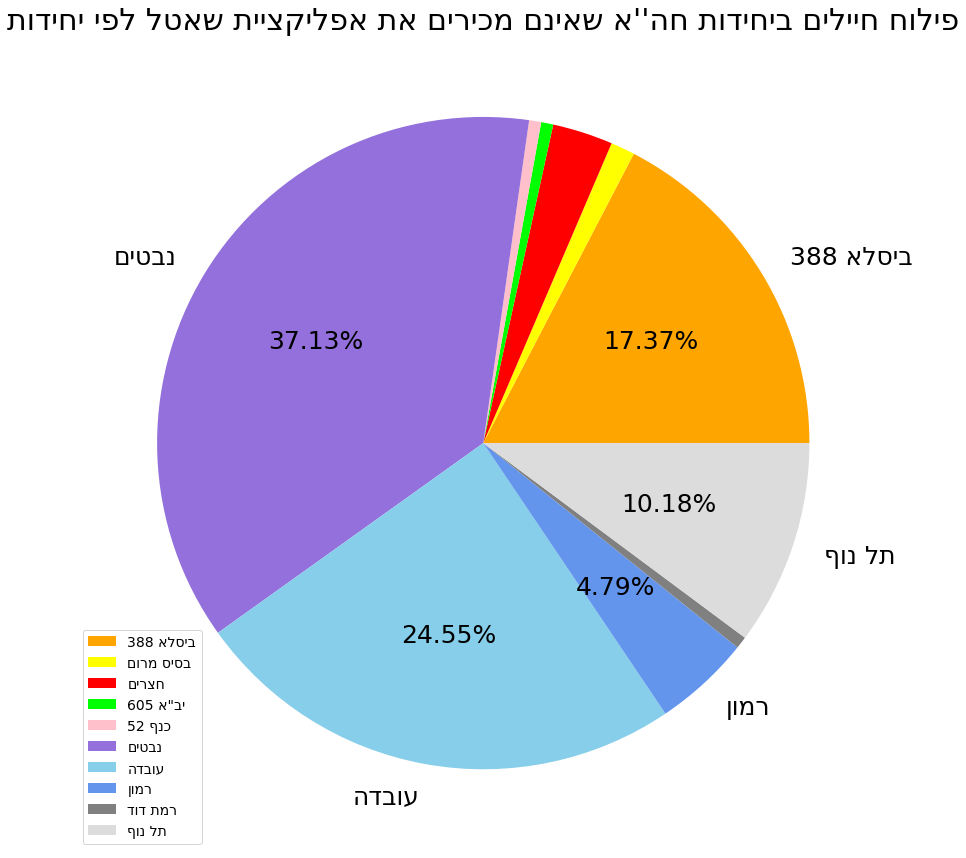

In [252]:
df = all_data[(all_data[all_data.columns[23]]=="לא")&(all_data[all_data.columns[53]]=='יחידות חה"א')][all_data.columns[4]].value_counts().sort_index()
labels = df.index
sizes = df.values
labels= [label[::-1] for label in labels]


label_dict = dict(zip(labels,df.values/sum(df.values)))

colors = dict(zip(labels,my_colors))
plt.figure(figsize  = (15,15))
plt.pie(sizes, labels=[label if label_dict[label]>0.03  else "" for label in labels],colors = [colors[p] for p in labels],autopct=lambda p: '{:.2f}%'.format(round(p,2)) if p > 3 else '',textprops={'fontsize': 25})
title_text = "פילוח חיילים ביחידות חה''א שאינם מכירים את אפליקציית שאטל לפי יחידות"
plt.title(title_text[::-1], size=  30)
plt.xticks(rotation = 90,size = 16)
plt.yticks(size = 14)
plt.legend(labels,loc = 'lower left',fontsize = 14)
plt.show()